In [189]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# import seaborn as sns
import itertools
from astropy.stats import sigma_clipped_stats

In [190]:
zps = pd.read_csv('./plots/zps_grouping_table.csv')
ois = pd.read_csv('./plots/ois_grouping_table.csv')
sps = pd.read_csv('./plots/sps_grouping_table.csv')
hot = pd.read_csv('./plots/hot_grouping_table.csv')

In [191]:
zps['m1_diam'] = 1000*zps['m1_diam']
sps['m1_diam'] = 1000*sps['m1_diam']
hot['m1_diam'] = 1000*hot['m1_diam']
ois['m1_diam'] = 1000*ois['m1_diam']

In [192]:
tabs = [zps, ois, hot, sps]
big_tab = pd.merge(zps, ois, on='Unnamed: 0', suffixes=('_zps', '_ois'))
big_tab = pd.merge(big_tab, hot, on='Unnamed: 0', suffixes=('', '_hot'))
big_tab = pd.merge(big_tab, sps, on='Unnamed: 0', suffixes=('', '_sps'))

In [193]:
len(big_tab)

27

In [194]:
cols = big_tab.columns

b_test_cols = [col for col in cols if '_test_' in col]
b_test0_cols = [col for col in cols if '_test0_' in col]

b_group_cols = list(cols[1:4])

b_knn_cols = [col for col in cols if col.startswith('knn')]
b_rfo_cols = [col for col in cols if col.startswith('rfo')]
b_svc_cols = [col for col in cols if col.startswith('svc')]

b_f1_cols = [col for col in cols if 'f1' in col]
b_acc_cols = [col for col in cols if '_acc' in col]
b_bacc_cols = [col for col in cols if '_bacc' in col]
b_reca_cols = [col for col in cols if '_reca' in col]
b_prec_cols = [col for col in cols if '_prec' in col]
b_aprec_cols = [col for col in cols if '_aprec' in col]

In [195]:
cols = hot.columns

test_cols = [col for col in cols if '_test_' in col]
test0_cols = [col for col in cols if '_test0_' in col]

group_cols = list(cols[1:4])

knn_cols = [col for col in cols if col.startswith('knn')]
rfo_cols = [col for col in cols if col.startswith('rfo')]
svc_cols = [col for col in cols if col.startswith('svc')]

f1_cols = [col for col in cols if 'f1' in col]
acc_cols = [col for col in cols if '_acc' in col]
bacc_cols = [col for col in cols if '_bacc' in col]
reca_cols = [col for col in cols if '_reca' in col]
prec_cols = [col for col in cols if '_prec' in col]
aprec_cols = [col for col in cols if '_aprec' in col]

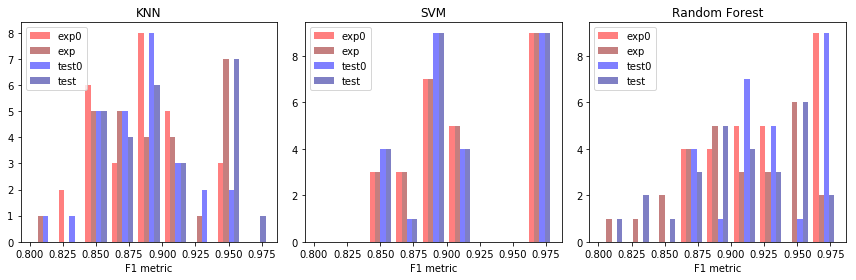

In [196]:
labels=['exp0', 'exp', 'test0', 'test']
colors=['red', 'darkred', 'blue', 'darkblue']

bins = np.arange(0.8, 1., 0.02)
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.title('KNN')
plt.hist([hot['knn_exp0_f1'],hot['knn_exp_f1'],
          hot['knn_test0_f1'], hot['knn_test_f1']],
          alpha=0.5, label=labels, bins=bins, color=colors)
plt.xlabel('F1 metric')
plt.legend(loc='best')

plt.subplot(132)
plt.title('SVM')
plt.hist([hot['svc_exp0_f1'],hot['svc_exp_f1'],
          hot['svc_test0_f1'], hot['svc_test_f1']],
          alpha=0.5, label=labels, bins=bins, color=colors)
plt.xlabel('F1 metric')
plt.legend(loc='best')

plt.subplot(133)
plt.title('Random Forest')
plt.hist([hot['rfo_exp0_f1'],hot['rfo_exp_f1'],
          hot['rfo_test0_f1'], hot['rfo_test_f1']],
          alpha=0.5, label=labels, bins=bins, color=colors)
plt.xlabel('F1 metric')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

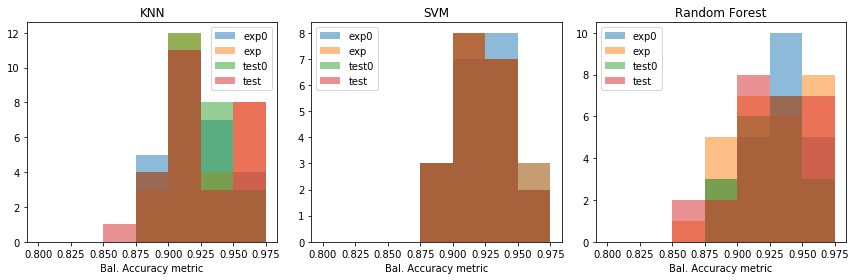

In [197]:
bins = np.arange(0.8, 1., 0.025)
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.title('KNN')
plt.hist(hot['knn_exp0_bacc'],  alpha=0.5, label='exp0',  bins=bins, histtype='bar')
plt.hist(hot['knn_exp_bacc'],   alpha=0.5, label='exp',   bins=bins, histtype='bar')
plt.hist(hot['knn_test0_bacc'], alpha=0.5, label='test0', bins=bins, histtype='bar')
plt.hist(hot['knn_test_bacc'],  alpha=0.5, label='test',  bins=bins, histtype='bar')
plt.xlabel('Bal. Accuracy metric')
plt.legend(loc='best')

plt.subplot(132)
plt.title('SVM')
plt.hist(hot['svc_exp0_bacc'],  alpha=0.5, label='exp0',  bins=bins)
plt.hist(hot['svc_exp_bacc'],   alpha=0.5, label='exp',   bins=bins)
plt.hist(hot['svc_test0_bacc'], alpha=0.5, label='test0', bins=bins)
plt.hist(hot['svc_test_bacc'],  alpha=0.5, label='test',  bins=bins)
plt.xlabel('Bal. Accuracy metric')
plt.legend(loc='best')

plt.subplot(133)
plt.title('Random Forest')
plt.hist(hot['rfo_exp0_bacc'],  alpha=0.5, label='exp0',  bins=bins)
plt.hist(hot['rfo_exp_bacc'],   alpha=0.5, label='exp',   bins=bins)
plt.hist(hot['rfo_test0_bacc'], alpha=0.5, label='test0', bins=bins)
plt.hist(hot['rfo_test_bacc'],  alpha=0.5, label='test',  bins=bins)
plt.xlabel('Bal. Accuracy metric')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

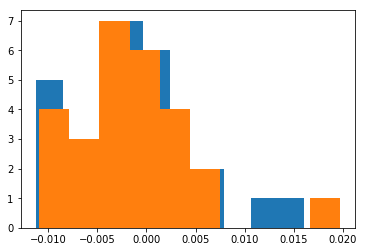

In [198]:
delta0_f1 = hot['knn_exp0_f1'] - hot['knn_test0_f1']
delta_f1 = hot['knn_exp_f1'] - hot['knn_test_f1']
delta0_bacc = hot['knn_exp0_bacc'] - hot['knn_test0_bacc']
delta_bacc = hot['knn_exp_bacc'] - hot['knn_test_bacc']

plt.hist(delta0_f1)
plt.hist(delta_f1)
plt.show()

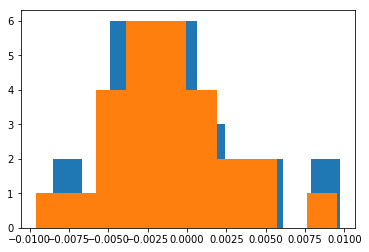

In [199]:
plt.hist(delta0_bacc)
plt.hist(delta_bacc)
plt.show()

In [200]:
non_matrix = [acol for acol in cols if not '_c' in acol]

In [201]:
f1 = [acol for acol in non_matrix if 'f1' in acol]

In [202]:
hot.columns

Index(['Unnamed: 0', 'm1_diam', 'exp_time', 'new_fwhm', 'knn_exp0_c00',
       'knn_exp0_c01', 'knn_exp0_c10', 'knn_exp0_c11', 'knn_exp0_bacc',
       'knn_exp0_acc',
       ...
       'svc_test_c00', 'svc_test_c01', 'svc_test_c10', 'svc_test_c11',
       'svc_test_bacc', 'svc_test_acc', 'svc_test_prec', 'svc_test_aprec',
       'svc_test_reca', 'svc_test_f1'],
      dtype='object', length=124)

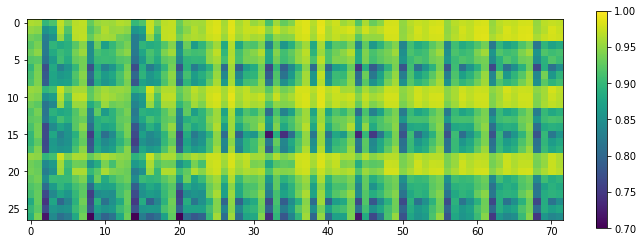

In [203]:
plt.figure(figsize=(12, 4))
plt.imshow(hot[non_matrix[4:]], vmin=0.7, vmax=1.)
plt.colorbar()

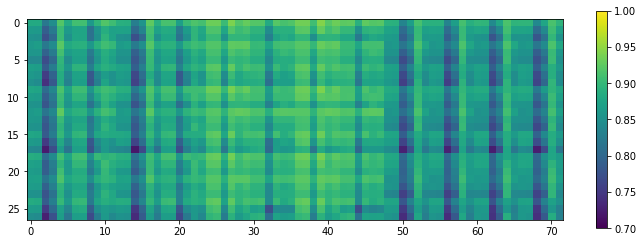

In [204]:
plt.figure(figsize=(12, 4))
plt.imshow(sps[non_matrix[4:]], vmin=0.7, vmax=1.)
plt.colorbar()

In [205]:
f1 = [col for col in b_f1_cols if '_test_' in col]

In [206]:
f1

['knn_test_f1_zps',
 'rfo_test_f1_zps',
 'svc_test_f1_zps',
 'knn_test_f1_ois',
 'rfo_test_f1_ois',
 'svc_test_f1_ois',
 'knn_test_f1',
 'rfo_test_f1',
 'svc_test_f1',
 'knn_test_f1_sps',
 'rfo_test_f1_sps',
 'svc_test_f1_sps']

In [207]:
group_cols

['m1_diam', 'exp_time', 'new_fwhm']

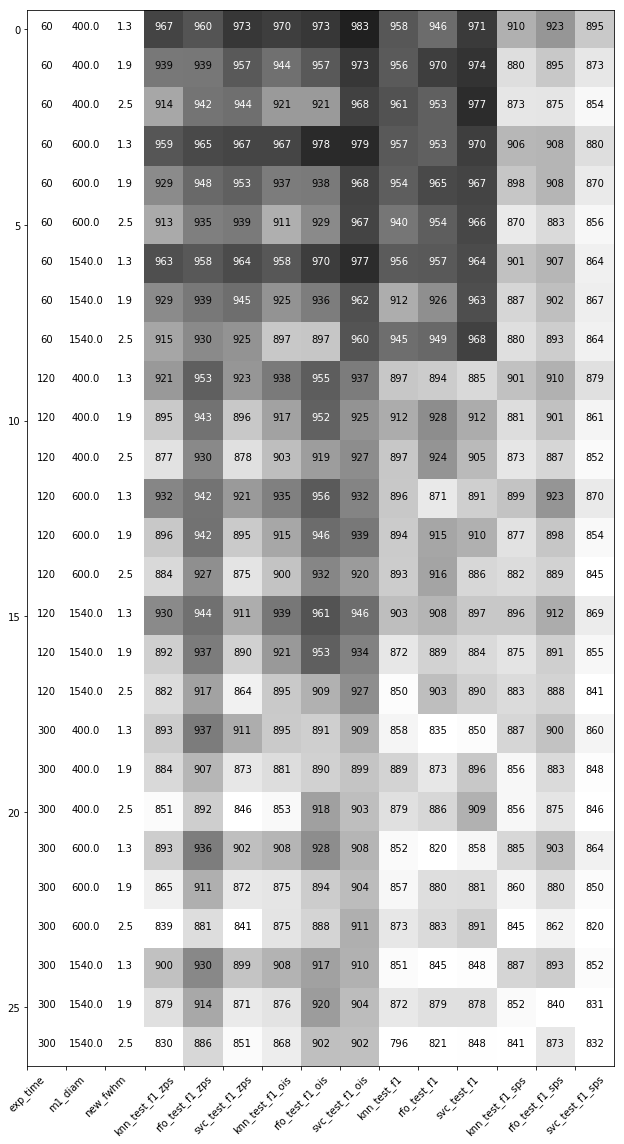

In [208]:
plt.figure(figsize=(28, 16))
pl_cols = [group_cols[1], group_cols[0], group_cols[2]]+f1
dat2 = big_tab[pl_cols].sort_values(by=[group_cols[1], group_cols[0], group_cols[2]])
dat = dat2.values
dat2['m1_diam'] = 0
dat2['new_fwhm'] = 0
dat2['exp_time'] = 0
dat2 = dat2.values
#dat = big_tab[pl_cols].values
plt.imshow(dat2, vmin=np.min(big_tab[f1].values)+0.05, vmax=1., interpolation='none', cmap=plt.cm.Greys)
tick_marks = np.arange(len(pl_cols))-0.5
plt.xticks(tick_marks, pl_cols, rotation=45)
fmt = '.3f'
thresh = (np.max(big_tab[f1].values) + np.min(big_tab[f1].values))/2. +0.05
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    if j>2:
        plt.text(j, i, format(1000*dat[i, j], '.0f'),
             horizontalalignment="center",
             color="white" if dat[i, j] > thresh else "black")
    elif j==0:
        plt.text(j, i, format(dat[i, j], '.0f'),
             horizontalalignment="center",
             color="black")
    else:
        plt.text(j, i, format(dat[i, j], '.1f'),
             horizontalalignment="center",
             color="black")
#plt.colorbar()
plt.tight_layout()
plt.savefig('f1_heatmap.svg', format='svg', dpi=780)

In [209]:
#import seaborn as sns
#sns.set_context(font_scale=12)
#plt.rcParams["patch.force_edgecolor"] = True

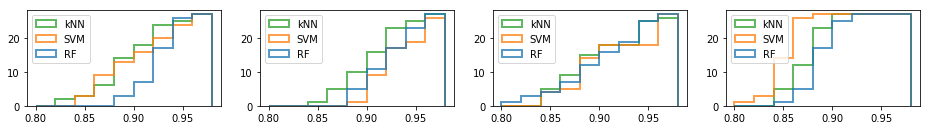

In [210]:
bins = np.arange(0.8, 1., 0.02)
plt.figure(figsize=(16, 6))

plt.subplot(341)
plt.hist([big_tab.rfo_test_f1_zps.values, big_tab.svc_test_f1_zps.values, big_tab.knn_test_f1_zps.values], 
        histtype='step', alpha=0.75, cumulative=True, linewidth=2, label=['RF', 'SVM', 'kNN'], bins=bins)
plt.legend(loc='upper left')

plt.subplot(342)
plt.hist([big_tab.rfo_test_f1_ois.values, big_tab.svc_test_f1_ois.values, big_tab.knn_test_f1_ois.values], 
        histtype='step', alpha=0.75, cumulative=True, linewidth=2, label=['RF', 'SVM', 'kNN'], bins=bins)
plt.legend(loc='upper left')

plt.subplot(343)
plt.hist([big_tab.rfo_test_f1.values, big_tab.svc_test_f1.values, big_tab.knn_test_f1.values], 
        histtype='step', alpha=0.75, cumulative=True, linewidth=2, label=['RF', 'SVM', 'kNN'], bins=bins)
plt.legend(loc='upper left')

plt.subplot(344)
plt.hist([big_tab.rfo_test_f1_sps.values, big_tab.svc_test_f1_sps.values, big_tab.knn_test_f1_sps.values], 
        histtype='step', alpha=0.75, cumulative=True, linewidth=2, label=['RF', 'SVM', 'kNN'], bins=bins)
plt.legend(loc='upper left')

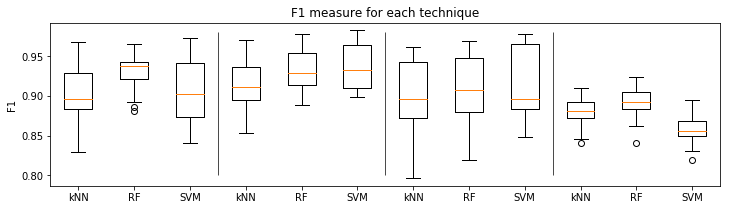

In [211]:
plt.figure(figsize=(12,3))
plt.title('F1 measure for each technique')
plt.boxplot(big_tab[f1].values)
plt.vlines(x=3.5, ymin=0.8, ymax=0.98, lw=0.7)
plt.vlines(x=6.5, ymin=0.8, ymax=0.98, lw=0.7)
plt.vlines(x=9.5, ymin=0.8, ymax=0.98, lw=0.7)
plt.xticks(np.arange(1, 13), ['kNN', 'RF', 'SVM']*4, rotation=0)
plt.ylabel('F1')
plt.savefig('boxplot_f1.pdf', format='pdf', dpi=780)

We only use the F1 value, and only on the test set...

Now we inspect the confusion matrices

In [212]:
cm_cols = [acol for acol in big_tab.columns if 'test_c' in acol]

In [213]:
knn_cms = big_tab[[col for col in cm_cols if ('zps' in col) and ('knn' in col)]].sum().values.reshape(2,2)
rfo_cms = big_tab[[col for col in cm_cols if ('zps' in col) and ('rfo' in col)]].sum().values.reshape(2,2)
svc_cms = big_tab[[col for col in cm_cols if ('zps' in col) and ('svc' in col)]].sum().values.reshape(2,2)

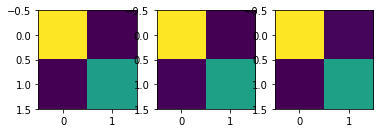

In [214]:
plt.subplot(131)
plt.imshow(knn_cms)
plt.subplot(132)
plt.imshow(rfo_cms)
plt.subplot(133)
plt.imshow(svc_cms)

In [215]:
zps_cms = big_tab[[col for col in cm_cols if ('zps' in col) and ('rfo' in col)]].sum().values.reshape(2,2)
hot_cms = big_tab[['rfo_test_c00', 'rfo_test_c01', 'rfo_test_c10', 'rfo_test_c11']].sum().values.reshape(2,2)
sps_cms = big_tab[[col for col in cm_cols if ('sps' in col) and ('rfo' in col)]].sum().values.reshape(2,2)
ois_cms = big_tab[[col for col in cm_cols if ('ois' in col) and ('rfo' in col)]].sum().values.reshape(2,2)

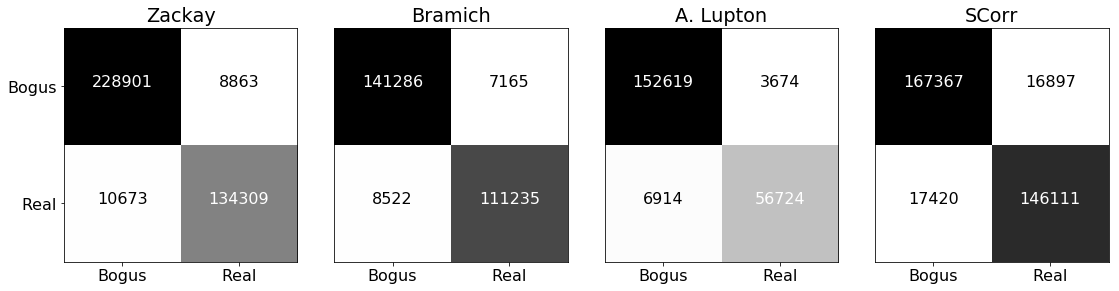

In [216]:
thresh=20000
plt.rcParams['font.size'] = 16
plt.figure(figsize=(16, 4))
plt.title('Simulated confusion matrix')
plt.subplot(141)
dat = zps_cms
plt.title('Zackay')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks(range(2), ['Bogus', 'Real'])
plt.subplot(142)
dat = ois_cms
plt.title('Bramich')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks([])
plt.subplot(143)
dat = hot_cms
plt.title('A. Lupton')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks([])
plt.subplot(144)
dat = sps_cms
plt.title('SCorr')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks([])
plt.tight_layout()
plt.savefig('confusion_matrices_rforest.svg', format='svg', dpi=720)

In [217]:
zps = pd.read_csv('./plots_full/zps_grouping_table_rfo.csv')
ois = pd.read_csv('./plots_full/ois_grouping_table_rfo.csv')
sps = pd.read_csv('./plots_full/sps_grouping_table_rfo.csv')
hot = pd.read_csv('./plots_full/hot_grouping_table_rfo.csv')

In [218]:
tabs = [zps, ois, hot, sps]
big_tab = pd.merge(zps, ois, on='Unnamed: 0', suffixes=('_zps', '_ois'))
big_tab = pd.merge(big_tab, hot, on='Unnamed: 0', suffixes=('', '_hot'))
big_tab = pd.merge(big_tab, sps, on='Unnamed: 0', suffixes=('', '_sps'))

In [219]:
len(big_tab)

27

In [220]:
cols = big_tab.columns

b_test_cols = [col for col in cols if '_test_' in col]
b_test0_cols = [col for col in cols if '_test0_' in col]

b_group_cols = list(cols[1:4])

b_knn_cols = [col for col in cols if col.startswith('knn')]
b_rfo_cols = [col for col in cols if col.startswith('rfo')]
b_svc_cols = [col for col in cols if col.startswith('svc')]

b_f1_cols = [col for col in cols if 'f1' in col]
b_acc_cols = [col for col in cols if '_acc' in col]
b_bacc_cols = [col for col in cols if '_bacc' in col]
b_reca_cols = [col for col in cols if '_reca' in col]
b_prec_cols = [col for col in cols if '_prec' in col]
b_aprec_cols = [col for col in cols if '_aprec' in col]

In [221]:
cm_cols = [acol for acol in big_tab.columns if 'test_c' in acol]

In [222]:
zps_cms = big_tab[[col for col in cm_cols if ('zps' in col) and ('rfo' in col)]].sum().values.reshape(2,2)
hot_cms = big_tab[['rfo_test_c00', 'rfo_test_c01', 'rfo_test_c10', 'rfo_test_c11']].sum().values.reshape(2,2)
sps_cms = big_tab[[col for col in cm_cols if ('sps' in col) and ('rfo' in col)]].sum().values.reshape(2,2)
ois_cms = big_tab[[col for col in cm_cols if ('ois' in col) and ('rfo' in col)]].sum().values.reshape(2,2)

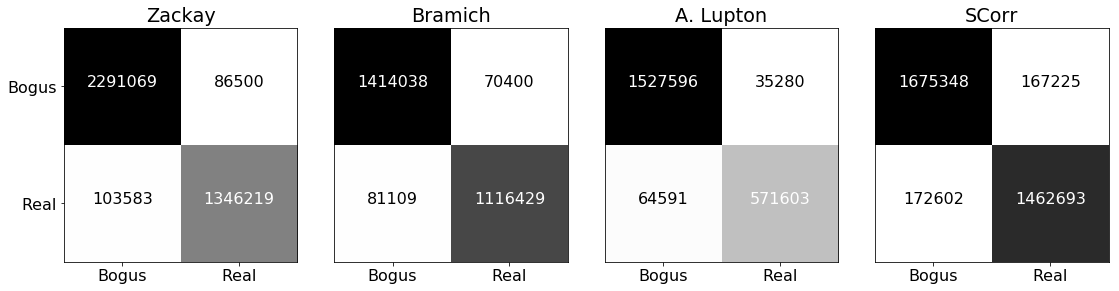

In [223]:
thresh=200000
plt.rcParams['font.size'] = 16
plt.figure(figsize=(16, 4))
plt.title('Simulated confusion matrix')
plt.subplot(141)
dat = zps_cms
plt.title('Zackay')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks(range(2), ['Bogus', 'Real'])
plt.subplot(142)
dat = ois_cms
plt.title('Bramich')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks([])
plt.subplot(143)
dat = hot_cms
plt.title('A. Lupton')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks([])
plt.subplot(144)
dat = sps_cms
plt.title('SCorr')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks([])
plt.tight_layout()
plt.savefig('confusion_matrices_rforest.svg', format='svg', dpi=720)

In [224]:
cm_cols_exp = [acol for acol in big_tab.columns if 'exp_c' in acol]

In [225]:
zps_cms_exp = big_tab[[col for col in cm_cols if ('zps' in col) and ('rfo' in col)]].sum().values.reshape(2,2)
hot_cms_exp = big_tab[['rfo_exp_c00', 'rfo_exp_c01', 'rfo_exp_c10', 'rfo_exp_c11']].sum().values.reshape(2,2)
sps_cms_exp = big_tab[[col for col in cm_cols if ('sps' in col) and ('rfo' in col)]].sum().values.reshape(2,2)
ois_cms_exp = big_tab[[col for col in cm_cols if ('ois' in col) and ('rfo' in col)]].sum().values.reshape(2,2)

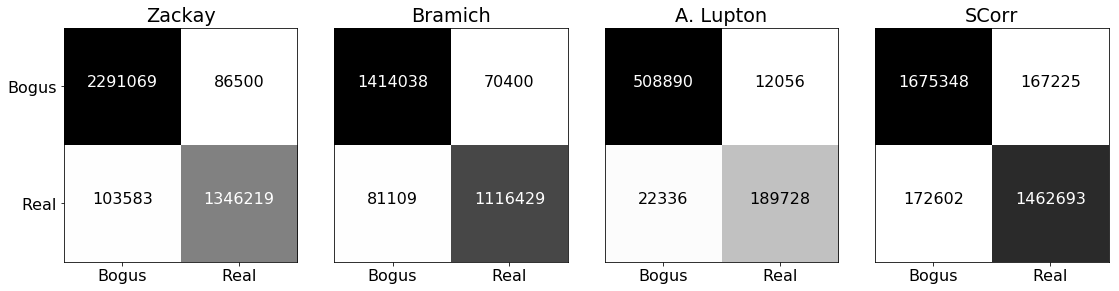

In [226]:
thresh=200000
plt.rcParams['font.size'] = 16
plt.figure(figsize=(16, 4))
plt.title('Simulated confusion matrix')
plt.subplot(141)
dat = zps_cms_exp
plt.title('Zackay')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks(range(2), ['Bogus', 'Real'])
plt.subplot(142)
dat = ois_cms_exp
plt.title('Bramich')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks([])
plt.subplot(143)
dat = hot_cms_exp
plt.title('A. Lupton')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks([])
plt.subplot(144)
dat = sps_cms_exp
plt.title('SCorr')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks([])
plt.tight_layout()
plt.savefig('confusion_matrices_rforest.svg', format='svg', dpi=720)

In [227]:
zps_cm_tot = zps_cms + zps_cms_exp
sps_cm_tot = sps_cms + sps_cms_exp
ois_cm_tot = ois_cms + ois_cms_exp
hot_cm_tot = hot_cms + hot_cms_exp

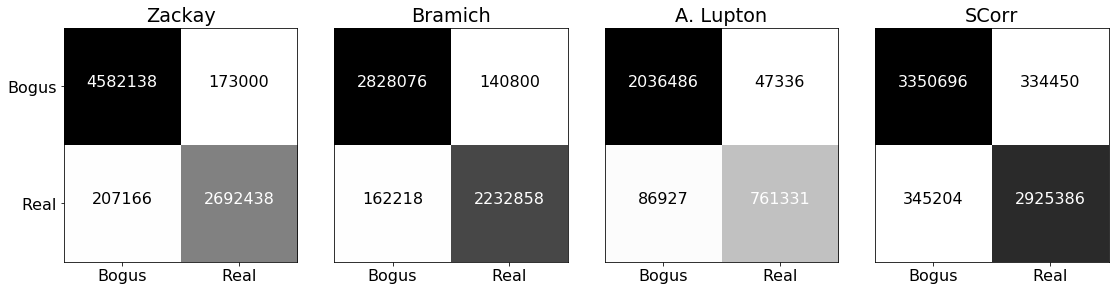

In [228]:
thresh=500000
plt.rcParams['font.size'] = 16
plt.figure(figsize=(16, 4))
plt.title('Simulated confusion matrix')
plt.subplot(141)
dat = zps_cm_tot
plt.title('Zackay')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks(range(2), ['Bogus', 'Real'])
plt.subplot(142)
dat = ois_cm_tot
plt.title('Bramich')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks([])
plt.subplot(143)
dat = hot_cm_tot
plt.title('A. Lupton')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks([])
plt.subplot(144)
dat = sps_cm_tot
plt.title('SCorr')
plt.imshow(dat, cmap='Greys')
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    plt.text(j, i, format(dat[i, j], '.0f'),
         horizontalalignment="center",
         color="white" if dat[i, j] > thresh else "black")
plt.xticks(range(2), ['Bogus', 'Real'])
plt.yticks([])
plt.tight_layout()
plt.savefig('confusion_matrices_rforest.svg', format='svg', dpi=720)

The true metric to evaluate is this:

* TP = Reals as Reals as come from ML

* FN = Reals as Bogus as comes from ML + sources lost in DIA

* FP = Bogus as Reals

* Precision = TP/(TP + FP)

* Recall = TP/(TP + FN)

* F1 = 2 PR/(P+R)

Zackay

In [229]:
FN_dia = [1339719, 1676071, 1301542, 1092394]

In [230]:
dat = zps_cm_tot
i = 0

In [231]:
def final_metric(dat, i, method='Zackay'):
    TP = dat[1, 1]
    FN = dat[1, 0] + FN_dia[i]
    FP = dat[0, 1]
    P = TP/(TP+FP)
    R = TP/(TP+FN)
    F1 = 2*P*R/(P+R)
    print(method+' Statistics\n')
    print('TP = {}'.format(TP))
    print('FN = {}'.format(FN))
    print('Total = {}'.format(FN+TP))
    
    print('FP = {}'.format(FP))
    print('P = {}'.format(np.round(P, 3)))
    print('R = {}'.format(np.round(R, 3)))
    print('F1 = {}'.format(np.round(F1, 3)))
    return[TP, FN, FP, P, R, F1]

In [232]:
for i_dat, dat in enumerate([[zps_cm_tot, 'Zackay'], [ois_cm_tot, 'Bramich'], [hot_cm_tot, 'ALupton'], [sps_cm_tot, 'SCorr']]):
    final_metric(dat[0], i_dat, method=dat[1])
    print('#=============================#\n')

Zackay Statistics

TP = 2692438.0
FN = 1546885.0
Total = 4239323.0
FP = 173000.0
P = 0.94
R = 0.635
F1 = 0.758
#=============================#

Bramich Statistics

TP = 2232858.0
FN = 1838289.0
Total = 4071147.0
FP = 140800.0
P = 0.941
R = 0.548
F1 = 0.693
#=============================#

ALupton Statistics

TP = 761331.0
FN = 1388469.0
Total = 2149800.0
FP = 47336.0
P = 0.941
R = 0.354
F1 = 0.515
#=============================#

SCorr Statistics

TP = 2925386.0
FN = 1437598.0
Total = 4362984.0
FP = 334450.0
P = 0.897
R = 0.671
F1 = 0.768
#=============================#



# Working with the new ml rundowns from clemente

In [233]:
zps = pd.read_csv('./plots/new_ml_zps/zps_grouping_table_rfo.csv')
ois = pd.read_csv('./plots/new_ml_ois/ois_grouping_table_rfo.csv')
sps = pd.read_csv('./plots/new_ml_sps/sps_grouping_table_rfo.csv')
hot = pd.read_csv('./plots/new_ml_hot/hot_grouping_table_rfo.csv')

In [234]:
zps.columns

Index(['Unnamed: 0', 'm1_diam', 'exp_time', 'new_fwhm', 'knn_exp0_c00',
       'knn_exp0_c01', 'knn_exp0_c10', 'knn_exp0_c11', 'knn_exp0_bacc',
       'knn_exp0_acc',
       ...
       'svc_fcm_00', 'svc_fcm_01', 'svc_fcm_10', 'svc_fcm_11', 'svc_fcm_TP',
       'svc_fcm_FP', 'svc_fcm_FN', 'svc_fcm_P', 'svc_fcm_R', 'svc_fcm_F1'],
      dtype='object', length=184)

In [235]:
zps['m1_diam'] = 1000*zps['m1_diam']
sps['m1_diam'] = 1000*sps['m1_diam']
hot['m1_diam'] = 1000*hot['m1_diam']
ois['m1_diam'] = 1000*ois['m1_diam']

In [236]:
tabs = [zps, ois, hot, sps]
big_tab = pd.merge(zps, ois, on='Unnamed: 0', suffixes=('_zps', '_ois'))
big_tab = pd.merge(big_tab, hot, on='Unnamed: 0', suffixes=('', '_hot'))
big_tab = pd.merge(big_tab, sps, on='Unnamed: 0', suffixes=('', '_sps'))

In [237]:
len(big_tab)

27

In [238]:
cols = big_tab.columns

b_test_cols = [col for col in cols if '_test_' in col]
b_test0_cols = [col for col in cols if '_test0_' in col]

b_group_cols = list(cols[1:4])

b_knn_cols = [col for col in cols if col.startswith('knn')]
b_rfo_cols = [col for col in cols if col.startswith('rfo')]
b_svc_cols = [col for col in cols if col.startswith('svc')]

b_f1_cols = [col for col in cols if 'f1' in col]
b_acc_cols = [col for col in cols if '_acc' in col]
b_bacc_cols = [col for col in cols if '_bacc' in col]
b_reca_cols = [col for col in cols if '_reca' in col]
b_prec_cols = [col for col in cols if '_prec' in col]
b_aprec_cols = [col for col in cols if '_aprec' in col]

In [239]:
fcm_F1 = [col for col in cols if 'cm_F1' in col]

In [240]:
cols = hot.columns

test_cols = [col for col in cols if '_test_' in col]
test0_cols = [col for col in cols if '_test0_' in col]

group_cols = list(cols[1:4])

knn_cols = [col for col in cols if col.startswith('knn')]
rfo_cols = [col for col in cols if col.startswith('rfo')]
svc_cols = [col for col in cols if col.startswith('svc')]

f1_cols = [col for col in cols if 'f1' in col]
acc_cols = [col for col in cols if '_acc' in col]
bacc_cols = [col for col in cols if '_bacc' in col]
reca_cols = [col for col in cols if '_reca' in col]
prec_cols = [col for col in cols if '_prec' in col]
aprec_cols = [col for col in cols if '_aprec' in col]

In [241]:
#sns.set_context(font_scale=8)

vmax=0.7897248517802745
vmin=0.45333947437680944


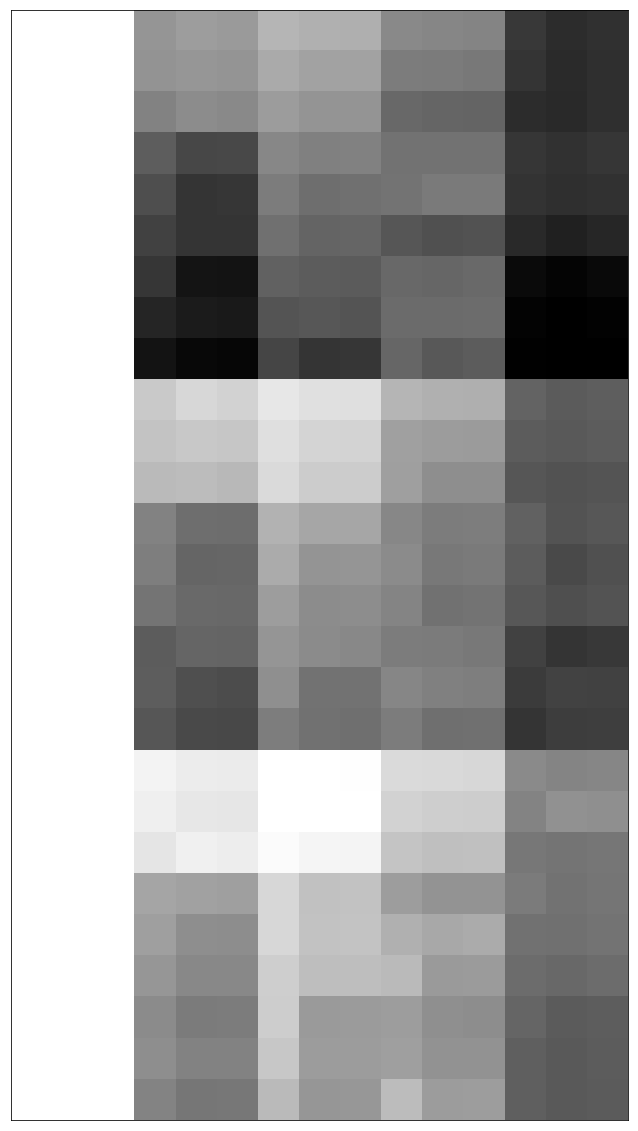

In [242]:
vals = fcm_F1 
plt.figure(figsize=(28, 16))
pl_cols = [group_cols[2],  group_cols[1], group_cols[0]]+ vals
dat2 = big_tab[pl_cols].sort_values(by=[group_cols[2],  group_cols[1], group_cols[0]])
dat = dat2.values
dat2['m1_diam'] = 0
dat2['new_fwhm'] = 0
dat2['exp_time'] = 0
dat2 = dat2.values
#dat = big_tab[pl_cols].values
plt.imshow(dat2, vmin=np.min(big_tab[vals].values)+0.01, 
           vmax=np.max(big_tab[vals].values)-0.01, 
           interpolation='none', cmap=plt.cm.Greys)
print('vmax={}'.format(np.max(big_tab[vals].values)-0.01))
print('vmin={}'.format(np.min(big_tab[vals].values)+0.01))
#tick_marks = np.arange(len(pl_cols))-0.5
#plt.xticks(tick_marks, pl_cols, rotation=45)
#fmt = '.3f'
#thresh = (np.max(big_tab[vals].values) + np.min(big_tab[vals].values))/2. +0.05
#for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
#    if j>2:
#        plt.text(j, i, format(1000*dat[i, j], '.0f'),
#             horizontalalignment="center",
#             color="white" if dat[i, j] > thresh else "black")
#    elif j==0:
#        plt.text(j, i, format(dat[i, j], '.1f'),
#             horizontalalignment="center",
#             color="black")
#    else:
#        plt.text(j, i, format(dat[i, j], '.0f'),
#             horizontalalignment="center",
#             color="black")
#plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig('f1_heatmap.png', format='png', dpi=780)

vmax=0.7897248517802745
vmin=0.45333947437680944


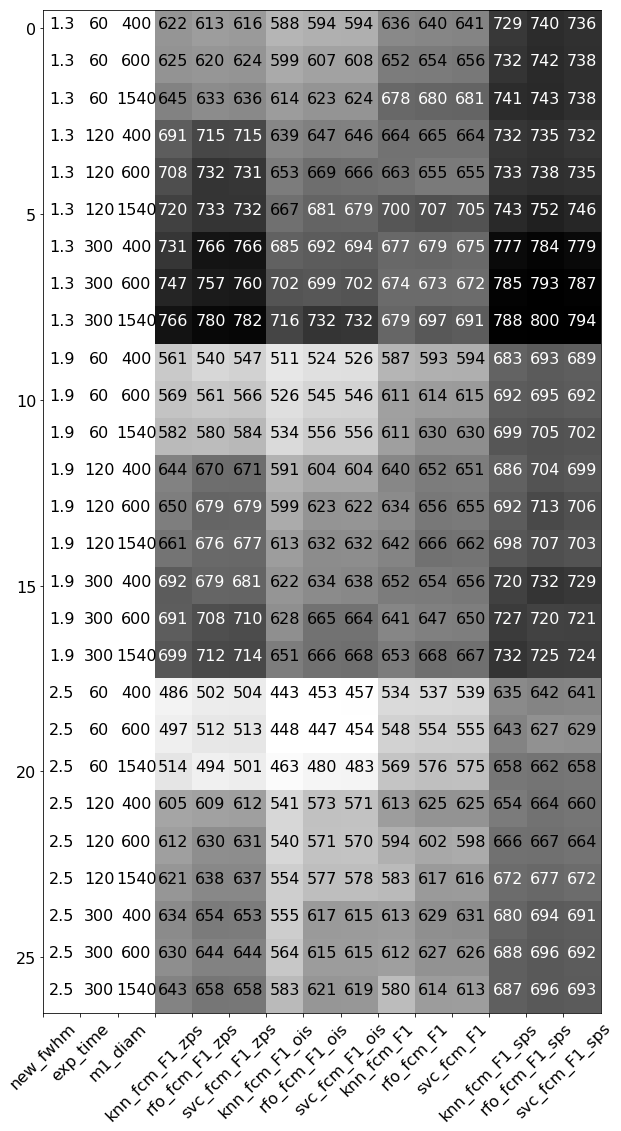

In [243]:
vals = fcm_F1 
plt.figure(figsize=(28, 16))
pl_cols = [group_cols[2],  group_cols[1], group_cols[0]]+ vals
dat2 = big_tab[pl_cols].sort_values(by=[group_cols[2],  group_cols[1], group_cols[0]])
dat = dat2.values
dat2['m1_diam'] = 0
dat2['new_fwhm'] = 0
dat2['exp_time'] = 0
dat2 = dat2.values
#dat = big_tab[pl_cols].values
plt.imshow(dat2, vmin=np.min(big_tab[vals].values)+0.01, 
           vmax=np.max(big_tab[vals].values)-0.01, 
           interpolation='nearest', cmap=plt.cm.Greys)
print('vmax={}'.format(np.max(big_tab[vals].values)-0.01))
print('vmin={}'.format(np.min(big_tab[vals].values)+0.01))
tick_marks = np.arange(len(pl_cols))-0.5
plt.xticks(tick_marks, pl_cols, rotation=45)
fmt = '.3f'
thresh = (np.max(big_tab[vals].values) + np.min(big_tab[vals].values))/2. +0.05
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    if j>2:
        plt.text(j, i, format(1000*dat[i, j], '.0f'),
             horizontalalignment="center",
             color="white" if dat[i, j] > thresh else "black")
    elif j==0:
        plt.text(j, i, format(dat[i, j], '.1f'),
             horizontalalignment="center",
             color="black")
    else:
        plt.text(j, i, format(dat[i, j], '.0f'),
             horizontalalignment="center",
             color="black")
#plt.colorbar()
plt.tight_layout()
plt.savefig('f1_heatmap.svg', format='svg', dpi=780)

In [244]:
diaf_FN_hot = (big_tab['knn_fcm_FN']-big_tab['knn_fcm_10'])
diaf_FN_zps = (big_tab['knn_fcm_FN_zps']-big_tab['knn_fcm_10_zps'])
diaf_FN_sps = (big_tab['knn_fcm_FN_sps']-big_tab['knn_fcm_10_sps'])
diaf_FN_ois = (big_tab['knn_fcm_FN_ois']-big_tab['knn_fcm_10_ois'])

In [245]:
diaf_TP_hot = (big_tab['knn_fcm_11']+big_tab['knn_fcm_10'])
diaf_TP_zps = (big_tab['knn_fcm_11_zps']+big_tab['knn_fcm_10_zps'])
diaf_TP_sps = (big_tab['knn_fcm_11_sps']+big_tab['knn_fcm_10_sps'])
diaf_TP_ois = (big_tab['knn_fcm_11_ois']+big_tab['knn_fcm_10_ois'])

In [246]:
diaf_FP_hot = (big_tab['knn_fcm_00']+big_tab['knn_fcm_01'])
diaf_FP_zps = (big_tab['knn_fcm_00_zps']+big_tab['knn_fcm_01_zps'])
diaf_FP_sps = (big_tab['knn_fcm_00_sps']+big_tab['knn_fcm_01_sps'])
diaf_FP_ois = (big_tab['knn_fcm_00_ois']+big_tab['knn_fcm_01_ois'])

In [247]:
diaf_P_hot = diaf_TP_hot/(diaf_TP_hot+diaf_FP_hot)
diaf_P_zps = diaf_TP_zps/(diaf_TP_zps+diaf_FP_zps)
diaf_P_sps = diaf_TP_sps/(diaf_TP_sps+diaf_FP_sps)
diaf_P_ois = diaf_TP_ois/(diaf_TP_ois+diaf_FP_ois)

In [248]:
diaf_R_hot = diaf_TP_hot/(diaf_TP_hot+diaf_FN_hot)
diaf_R_zps = diaf_TP_zps/(diaf_TP_zps+diaf_FN_zps)
diaf_R_sps = diaf_TP_sps/(diaf_TP_sps+diaf_FN_sps)
diaf_R_ois = diaf_TP_ois/(diaf_TP_ois+diaf_FN_ois)

In [249]:
diaf_F1_hot = 2 * diaf_P_hot * diaf_R_hot /(diaf_P_hot+diaf_R_hot)
diaf_F1_zps = 2 * diaf_P_zps * diaf_R_zps /(diaf_P_zps+diaf_R_zps)
diaf_F1_sps = 2 * diaf_P_sps * diaf_R_sps /(diaf_P_sps+diaf_R_sps)
diaf_F1_ois = 2 * diaf_P_ois * diaf_R_ois /(diaf_P_ois+diaf_R_ois)

In [261]:
print(np.sum(diaf_TP_hot), np.sum(diaf_FN_hot), np.sum(diaf_FP_hot), np.sum(diaf_TP_hot)+np.sum(diaf_FN_hot))
print(np.sum(diaf_TP_zps), np.sum(diaf_FN_zps), np.sum(diaf_FP_zps), np.sum(diaf_TP_zps)+np.sum(diaf_FN_zps))
print(np.sum(diaf_TP_sps), np.sum(diaf_FN_sps), np.sum(diaf_FP_sps), np.sum(diaf_TP_sps)+np.sum(diaf_FN_sps))
print(np.sum(diaf_TP_ois), np.sum(diaf_FN_ois), np.sum(diaf_FP_ois), np.sum(diaf_TP_ois)+np.sum(diaf_FN_ois))

848258.0 764233.0 2083822.0 1612491.0
483696.0 334930.0 792091.0 818626.0
2180390.0 1092394.0 2456754.0 3272784.0
1596713.0 1676071.0 1979241.0 3272784.0


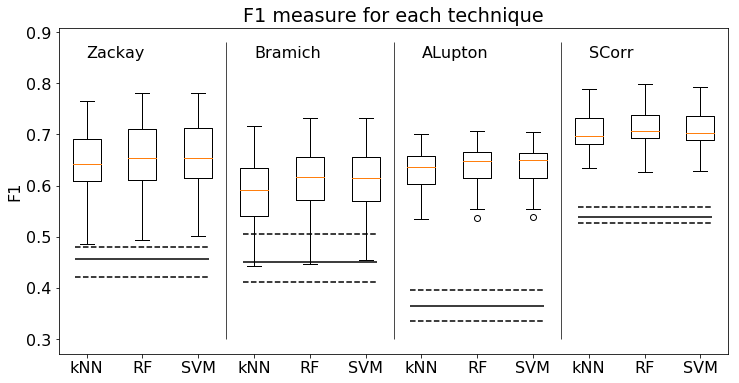

In [250]:
plt.figure(figsize=(12,6))
plt.title('F1 measure for each technique')
plt.boxplot(big_tab[vals].values)

plt.hlines(y=np.median(diaf_F1_zps), xmin=0.8, xmax=3.2)
plt.hlines(y=np.percentile(diaf_F1_zps, q=[25, 75]), xmin=0.8, xmax=3.2, linestyles='--')
plt.vlines(x=3.5, ymin=0.3, ymax=0.88, lw=0.7)

plt.hlines(y=np.median(diaf_F1_ois), xmin=3.8, xmax=6.2)
plt.hlines(y=np.percentile(diaf_F1_ois, q=[25, 75]), xmin=3.8, xmax=6.2, linestyles='--')
plt.vlines(x=6.5, ymin=0.3, ymax=0.88, lw=0.7)

plt.hlines(y=np.median(diaf_F1_hot), xmin=6.8, xmax=9.2)
plt.hlines(y=np.percentile(diaf_F1_hot, q=[25, 75]), xmin=6.8, xmax=9.2, linestyles='--')
plt.vlines(x=9.5, ymin=0.3, ymax=0.88, lw=0.7)

plt.hlines(y=np.median(diaf_F1_sps), xmin=9.8, xmax=12.2)
plt.hlines(y=np.percentile(diaf_F1_sps, q=[25, 75]), xmin=9.8, xmax=12.2, linestyles='--')

plt.xticks(np.arange(1, 13), ['kNN', 'RF', 'SVM']*4, rotation=0)

plt.text(s='Zackay', x=1, y=0.85)
plt.text(s='Bramich', x=4, y=0.85)
plt.text(s='ALupton', x=7, y=0.85)
plt.text(s='SCorr', x=10, y=0.85)

plt.ylabel('F1')
plt.savefig('boxplot_f1.pdf', format='pdf', dpi=780)

In [251]:
big_tab['knn_F1_rate_zps'] = big_tab['knn_fcm_F1_zps']/diaf_F1_zps
big_tab['svc_F1_rate_zps'] = big_tab['svc_fcm_F1_zps']/diaf_F1_zps
big_tab['rfo_F1_rate_zps'] = big_tab['rfo_fcm_F1_zps']/diaf_F1_zps

big_tab['knn_F1_rate_sps'] = big_tab['knn_fcm_F1_sps']/diaf_F1_sps
big_tab['svc_F1_rate_sps'] = big_tab['svc_fcm_F1_sps']/diaf_F1_sps
big_tab['rfo_F1_rate_sps'] = big_tab['rfo_fcm_F1_sps']/diaf_F1_sps

big_tab['knn_F1_rate_hot'] = big_tab['knn_fcm_F1']/diaf_F1_hot
big_tab['svc_F1_rate_hot'] = big_tab['svc_fcm_F1']/diaf_F1_hot
big_tab['rfo_F1_rate_hot'] = big_tab['rfo_fcm_F1']/diaf_F1_hot

big_tab['knn_F1_rate_ois'] = big_tab['knn_fcm_F1_ois']/diaf_F1_ois
big_tab['svc_F1_rate_ois'] = big_tab['svc_fcm_F1_ois']/diaf_F1_ois
big_tab['rfo_F1_rate_ois'] = big_tab['rfo_fcm_F1_ois']/diaf_F1_ois

vmax=2.244123510179283
vmin=1.1473163922015808


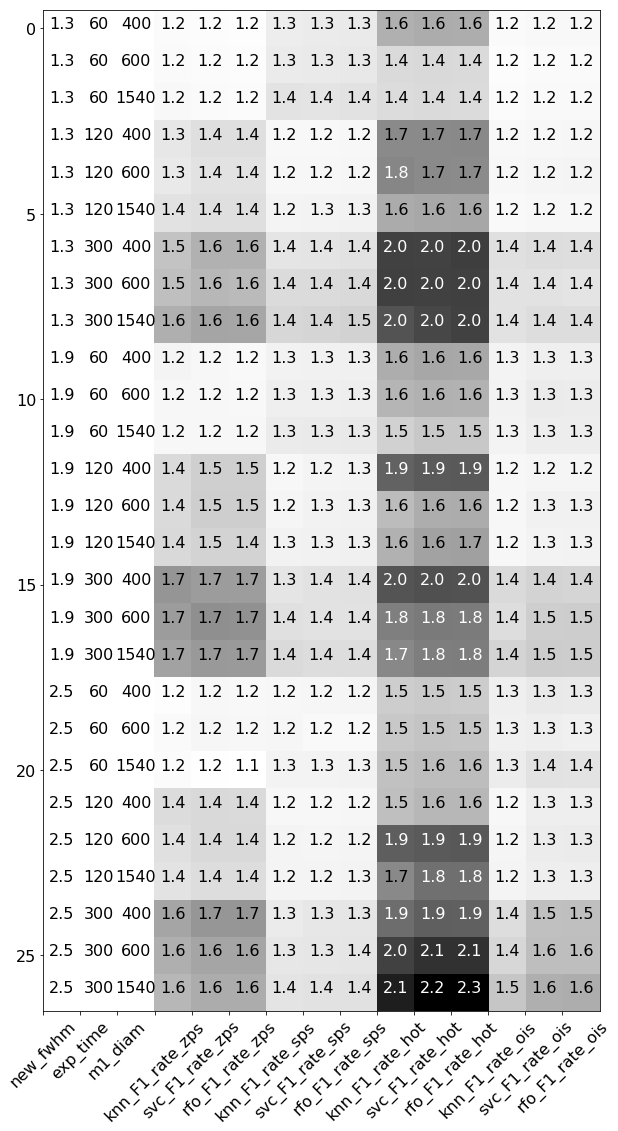

In [252]:
vals = [acol for acol in big_tab.columns if 'F1_rate' in acol] 
plt.figure(figsize=(28, 16))
pl_cols = [group_cols[2],  group_cols[1], group_cols[0]]+ vals
dat2 = big_tab[pl_cols].sort_values(by=[group_cols[2],  group_cols[1], group_cols[0]])
dat = dat2.values
dat2['m1_diam'] = 0
dat2['new_fwhm'] = 0
dat2['exp_time'] = 0
dat2 = dat2.values
#dat = big_tab[pl_cols].values
plt.imshow(dat2, vmin=np.min(big_tab[vals].values)+0.01, 
           vmax=np.max(big_tab[vals].values)-0.01, 
           interpolation='nearest', cmap=plt.cm.Greys)
print('vmax={}'.format(np.max(big_tab[vals].values)-0.01))
print('vmin={}'.format(np.min(big_tab[vals].values)+0.01))
tick_marks = np.arange(len(pl_cols))-0.5
plt.xticks(tick_marks, pl_cols, rotation=45)
fmt = '.3f'
thresh = (np.max(big_tab[vals].values) + np.min(big_tab[vals].values))/2. +0.05
for i, j in itertools.product(range(dat.shape[0]), range(dat.shape[1])):
    if j>2:
        plt.text(j, i, format(dat[i, j], '.2'),
             horizontalalignment="center",
             color="white" if dat[i, j] > thresh else "black")
    elif j==0:
        plt.text(j, i, format(dat[i, j], '.1f'),
             horizontalalignment="center",
             color="black")
    else:
        plt.text(j, i, format(dat[i, j], '.0f'),
             horizontalalignment="center",
             color="black")
#plt.colorbar()
plt.tight_layout()
plt.savefig('f1_heatmap_ratio.svg', format='svg', dpi=780)

In [253]:
from joblib import load, dump

In [254]:
zps_rfsigs = load('./plots/new_ml_zps/rforest_sigs_zps.joblib')
ois_rfsigs = load('./plots/new_ml_zps/rforest_sigs_zps.joblib')
sps_rfsigs = load('./plots/new_ml_sps/rforest_sigs_sps.joblib')
hot_rfsigs = load('./plots/new_ml_hot/rforest_sigs_hot.joblib')

In [255]:
def franking(rfsigs):
    counts = pd.Series(np.zeros_like(rfsigs[0].values), 
                       index=rfsigs[0].index, dtype=int)
    for asig in zps_rfsigs:
        asig = asig.loc[~asig.isnull()]
        sel = asig.dropna()>2.5
        for anindex in sel.loc[sel].index:
            if asig[anindex] is not np.inf:
                if anindex not in counts.index:
                    counts[anindex] = 0
                else:
                    counts[anindex] += 1
    return counts

In [256]:
counts = franking(zps_rfsigs)

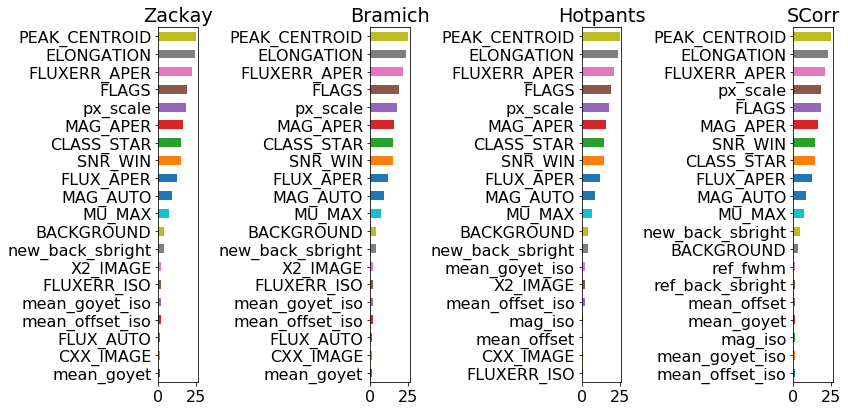

In [257]:
plt.figure(figsize=(12,6))
plt.subplot(141)
counts = franking(zps_rfsigs)
counts.sort_values().iloc[-20:].plot.barh(title='Zackay')

plt.subplot(142)
counts = franking(ois_rfsigs)
counts.sort_values().iloc[-20:].plot.barh(title='Bramich')

plt.subplot(143)
counts = franking(hot_rfsigs)
counts.sort_values().iloc[-20:].plot.barh(title='Hotpants')

plt.subplot(144)
counts = franking(sps_rfsigs)
counts.sort_values().iloc[-20:].plot.barh(title='SCorr')
#plt.xticks(rotation=45)
plt.tight_layout()

In [258]:
zps_knsigs = load('./plots/new_ml_zps/knn_fsel_zps.joblib')
ois_knsigs = load('./plots/new_ml_zps/knn_fsel_zps.joblib')
sps_knsigs = load('./plots/new_ml_sps/knn_fsel_sps.joblib')
hot_knsigs = load('./plots/new_ml_hot/knn_fsel_hot.joblib')

In [ ]:
zps_knsigs